# Practical Work

<b> Student: </b> Jonas Fallmann <br>
<b> Matrikulation number </b> 12018700 <br>
<b> Topic:</b> Evaulating gender bias of explained recommender systems<br>
<b> Institute: </b> Institute of Computational Perception, Johannes Kepler University Linz

## Outline
Recent advances in the field of recommender systems focus in a big part on explanations of recommended Items. Explainability has been shown to aid user trust and results in higher conversion rates in the online shopping domain. As an example, explanations in the music domain could be of the following form:

<b>Recommended Item:</b> Clocks and Whoopty by Pintel Ragetti<br>
<b> Explanation: </b>  



# Train Model

### Load config and create Dataset

In [3]:
from logging import getLogger
from recbole.config import Config
from recbole.data import create_dataset, data_preparation
from recbole.model.knowledge_aware_recommender import KGAT
from recbole.trainer import KGATTrainer
from recbole.utils import init_seed, init_logger

train_model = True
create_paths = True

In [4]:

# configurations initialization
config = Config(model='KGAT', dataset='rb_lfm', config_file_list=['lfm.yaml'])

# init random seed
init_seed(config['seed'], config['reproducibility'])

# logger initialization
init_logger(config)
logger = getLogger()

# write config info into log
logger.info(config)

# dataset creating and filtering
dataset = create_dataset(config)
logger.info(dataset)

# dataset splitting
train_data, valid_data, test_data = data_preparation(config, dataset)


12 Mar 22:46    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020
state = INFO
reproducibility = True
data_path = ./data/rb_lfm
checkpoint_dir = saved
show_progress = True
save_dataset = False
dataset_save_path = None
save_dataloaders = False
dataloaders_save_path = None
log_wandb = False

Training Hyper Parameters:
epochs = 40
train_batch_size = 1024
learner = adam
learning_rate = 0.001
train_neg_sample_args = {'distribution': 'uniform', 'sample_num': 1, 'alpha': 1.0, 'dynamic': False, 'candidate_num': 0}
eval_step = 1
stopping_step = 10
clip_grad_norm = None
weight_decay = 0.0
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_args = {'split': {'RS': [8, 1, 1]}, 'group_by': 'user', 'order': 'RO', 'mode': 'full'}
repeatable = False
metrics = ['NDCG', 'Hit', 'Precision']
topk = [10]
valid_metric = NDCG@10
valid_metric_bigger = True
eval_batch_size = 1024
metric_decimal_place = 4

Dataset Hyper Parameters:
field_separator = 	
seq_separator =  
USER_ID_FIELD =

### Train model and evaluate

In [5]:
if train_model:
    # model loading and initialization
    model = KGAT(config, train_data._dataset).to(config['device'])
    logger.info(model)

    # trainer loading and initialization
    trainer = KGATTrainer(config, model)

    print('Starting to fit model')
    # model training
    best_valid_score, best_valid_result = trainer.fit(train_data, valid_data, saved=True, show_progress=True)

    print('Evaluating model')
    # model evaluation
    test_result = trainer.evaluate(test_data, load_best_model=True)
    print(test_result)

/home/jfallmann/miniconda3/envs/pr/lib/python3.9/site-packages/dgl/subgraph.py:288: DGLWarning: Key word argument preserve_nodes is deprecated. Use relabel_nodes instead.
  dgl_warning(
/home/jfallmann/miniconda3/envs/pr/lib/python3.9/site-packages/recbole/model/knowledge_aware_recommender/kgat.py:159: RuntimeWarning: divide by zero encountered in power
  d_inv = np.power(rowsum, -1).flatten()
/home/jfallmann/miniconda3/envs/pr/lib/python3.9/site-packages/recbole/model/knowledge_aware_recommender/kgat.py:166: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525551200/work/torch/csrc/utils/tensor_new.cpp:230.)
  indices = torch.LongTensor([final_adj_matrix.row, final_adj_matrix.col])
12 Mar 22:46    INFO  KGAT(
  (user_embedding): Embedding(9708, 32)
  (entity_embedding): Embedding(260190,

Starting to fit model


Train     0:   0%|          | 0/2482 [00:00<?, ?it/s]

Train     0:   0%|          | 0/2477 [00:00<?, ?it/s]

12 Mar 22:58    INFO  epoch 0 training [time: 711.02s, train_loss1: 854.8534, train_loss2: 145.6671]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

12 Mar 22:58    INFO  epoch 0 evaluating [time: 19.01s, valid_score: 0.006500]
12 Mar 22:58    INFO  valid result: 
ndcg@10 : 0.0065    hit@10 : 0.0588    precision@10 : 0.0062
12 Mar 22:58    INFO  Saving current: saved/KGAT-Mar-12-2023_22-46-45.pth


Train     1:   0%|          | 0/2482 [00:00<?, ?it/s]

Train     1:   0%|          | 0/2477 [00:00<?, ?it/s]

12 Mar 23:08    INFO  epoch 1 training [time: 558.62s, train_loss1: 920.4822, train_loss2: 36.6092]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

12 Mar 23:08    INFO  epoch 1 evaluating [time: 19.26s, valid_score: 0.017000]
12 Mar 23:08    INFO  valid result: 
ndcg@10 : 0.017    hit@10 : 0.1281    precision@10 : 0.0153
12 Mar 23:08    INFO  Saving current: saved/KGAT-Mar-12-2023_22-46-45.pth


Train     2:   0%|          | 0/2482 [00:00<?, ?it/s]

Train     2:   0%|          | 0/2477 [00:00<?, ?it/s]

12 Mar 23:17    INFO  epoch 2 training [time: 558.27s, train_loss1: 755.9662, train_loss2: 20.2830]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

12 Mar 23:18    INFO  epoch 2 evaluating [time: 19.05s, valid_score: 0.023500]
12 Mar 23:18    INFO  valid result: 
ndcg@10 : 0.0235    hit@10 : 0.1722    precision@10 : 0.0216
12 Mar 23:18    INFO  Saving current: saved/KGAT-Mar-12-2023_22-46-45.pth


Train     3:   0%|          | 0/2482 [00:00<?, ?it/s]

Train     3:   0%|          | 0/2477 [00:00<?, ?it/s]

12 Mar 23:27    INFO  epoch 3 training [time: 558.15s, train_loss1: 660.1019, train_loss2: 13.9480]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

12 Mar 23:27    INFO  epoch 3 evaluating [time: 19.28s, valid_score: 0.028400]
12 Mar 23:27    INFO  valid result: 
ndcg@10 : 0.0284    hit@10 : 0.1954    precision@10 : 0.0258
12 Mar 23:27    INFO  Saving current: saved/KGAT-Mar-12-2023_22-46-45.pth


Train     4:   0%|          | 0/2482 [00:00<?, ?it/s]

Train     4:   0%|          | 0/2477 [00:00<?, ?it/s]

12 Mar 23:37    INFO  epoch 4 training [time: 558.51s, train_loss1: 575.6870, train_loss2: 10.7574]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

12 Mar 23:37    INFO  epoch 4 evaluating [time: 19.13s, valid_score: 0.031600]
12 Mar 23:37    INFO  valid result: 
ndcg@10 : 0.0316    hit@10 : 0.2091    precision@10 : 0.0277
12 Mar 23:37    INFO  Saving current: saved/KGAT-Mar-12-2023_22-46-45.pth


Train     5:   0%|          | 0/2482 [00:00<?, ?it/s]

Train     5:   0%|          | 0/2477 [00:00<?, ?it/s]

12 Mar 23:46    INFO  epoch 5 training [time: 558.73s, train_loss1: 507.9978, train_loss2: 8.2691]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

12 Mar 23:47    INFO  epoch 5 evaluating [time: 19.15s, valid_score: 0.033200]
12 Mar 23:47    INFO  valid result: 
ndcg@10 : 0.0332    hit@10 : 0.217    precision@10 : 0.0294
12 Mar 23:47    INFO  Saving current: saved/KGAT-Mar-12-2023_22-46-45.pth


Train     6:   0%|          | 0/2482 [00:00<?, ?it/s]

Train     6:   0%|          | 0/2477 [00:00<?, ?it/s]

12 Mar 23:56    INFO  epoch 6 training [time: 558.52s, train_loss1: 456.6188, train_loss2: 6.6974]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

12 Mar 23:56    INFO  epoch 6 evaluating [time: 19.27s, valid_score: 0.034900]
12 Mar 23:56    INFO  valid result: 
ndcg@10 : 0.0349    hit@10 : 0.2245    precision@10 : 0.0303
12 Mar 23:56    INFO  Saving current: saved/KGAT-Mar-12-2023_22-46-45.pth


Train     7:   0%|          | 0/2482 [00:00<?, ?it/s]

Train     7:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 00:06    INFO  epoch 7 training [time: 558.80s, train_loss1: 415.0009, train_loss2: 5.6462]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 00:06    INFO  epoch 7 evaluating [time: 19.46s, valid_score: 0.034900]
13 Mar 00:06    INFO  valid result: 
ndcg@10 : 0.0349    hit@10 : 0.2264    precision@10 : 0.0308
13 Mar 00:06    INFO  Saving current: saved/KGAT-Mar-12-2023_22-46-45.pth


Train     8:   0%|          | 0/2482 [00:00<?, ?it/s]

Train     8:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 00:15    INFO  epoch 8 training [time: 558.12s, train_loss1: 381.9611, train_loss2: 5.0429]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 00:15    INFO  epoch 8 evaluating [time: 19.14s, valid_score: 0.035900]
13 Mar 00:15    INFO  valid result: 
ndcg@10 : 0.0359    hit@10 : 0.2285    precision@10 : 0.0311
13 Mar 00:16    INFO  Saving current: saved/KGAT-Mar-12-2023_22-46-45.pth


Train     9:   0%|          | 0/2482 [00:00<?, ?it/s]

Train     9:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 00:25    INFO  epoch 9 training [time: 557.88s, train_loss1: 352.4132, train_loss2: 4.2994]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 00:25    INFO  epoch 9 evaluating [time: 19.62s, valid_score: 0.035700]
13 Mar 00:25    INFO  valid result: 
ndcg@10 : 0.0357    hit@10 : 0.2248    precision@10 : 0.0308


Train    10:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    10:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 00:34    INFO  epoch 10 training [time: 558.49s, train_loss1: 327.3698, train_loss2: 3.8377]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 00:35    INFO  epoch 10 evaluating [time: 19.60s, valid_score: 0.035000]
13 Mar 00:35    INFO  valid result: 
ndcg@10 : 0.035    hit@10 : 0.2256    precision@10 : 0.0308


Train    11:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    11:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 00:44    INFO  epoch 11 training [time: 558.25s, train_loss1: 308.4997, train_loss2: 3.4309]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 00:44    INFO  epoch 11 evaluating [time: 19.43s, valid_score: 0.035800]
13 Mar 00:44    INFO  valid result: 
ndcg@10 : 0.0358    hit@10 : 0.2328    precision@10 : 0.0317


Train    12:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    12:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 00:54    INFO  epoch 12 training [time: 558.78s, train_loss1: 287.2889, train_loss2: 3.2159]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 00:54    INFO  epoch 12 evaluating [time: 19.78s, valid_score: 0.035800]
13 Mar 00:54    INFO  valid result: 
ndcg@10 : 0.0358    hit@10 : 0.2306    precision@10 : 0.0315


Train    13:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    13:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 01:03    INFO  epoch 13 training [time: 558.51s, train_loss1: 271.1874, train_loss2: 2.9385]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 01:04    INFO  epoch 13 evaluating [time: 19.49s, valid_score: 0.036100]
13 Mar 01:04    INFO  valid result: 
ndcg@10 : 0.0361    hit@10 : 0.2331    precision@10 : 0.0319
13 Mar 01:04    INFO  Saving current: saved/KGAT-Mar-12-2023_22-46-45.pth


Train    14:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    14:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 01:13    INFO  epoch 14 training [time: 558.69s, train_loss1: 255.9225, train_loss2: 2.7500]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 01:13    INFO  epoch 14 evaluating [time: 20.35s, valid_score: 0.035700]
13 Mar 01:13    INFO  valid result: 
ndcg@10 : 0.0357    hit@10 : 0.231    precision@10 : 0.0315


Train    15:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    15:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 01:23    INFO  epoch 15 training [time: 558.47s, train_loss1: 243.4529, train_loss2: 2.5882]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 01:23    INFO  epoch 15 evaluating [time: 19.29s, valid_score: 0.036600]
13 Mar 01:23    INFO  valid result: 
ndcg@10 : 0.0366    hit@10 : 0.2387    precision@10 : 0.0325
13 Mar 01:23    INFO  Saving current: saved/KGAT-Mar-12-2023_22-46-45.pth


Train    16:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    16:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 01:32    INFO  epoch 16 training [time: 558.81s, train_loss1: 231.1356, train_loss2: 2.3902]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 01:33    INFO  epoch 16 evaluating [time: 19.33s, valid_score: 0.037900]
13 Mar 01:33    INFO  valid result: 
ndcg@10 : 0.0379    hit@10 : 0.241    precision@10 : 0.0332
13 Mar 01:33    INFO  Saving current: saved/KGAT-Mar-12-2023_22-46-45.pth


Train    17:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    17:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 01:42    INFO  epoch 17 training [time: 558.06s, train_loss1: 219.9905, train_loss2: 2.1316]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 01:42    INFO  epoch 17 evaluating [time: 19.38s, valid_score: 0.037500]
13 Mar 01:42    INFO  valid result: 
ndcg@10 : 0.0375    hit@10 : 0.2405    precision@10 : 0.0328


Train    18:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    18:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 01:52    INFO  epoch 18 training [time: 558.38s, train_loss1: 210.4614, train_loss2: 2.2364]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 01:52    INFO  epoch 18 evaluating [time: 19.47s, valid_score: 0.037000]
13 Mar 01:52    INFO  valid result: 
ndcg@10 : 0.037    hit@10 : 0.2417    precision@10 : 0.0326


Train    19:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    19:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 02:01    INFO  epoch 19 training [time: 559.18s, train_loss1: 201.9276, train_loss2: 2.0947]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 02:01    INFO  epoch 19 evaluating [time: 19.33s, valid_score: 0.037200]
13 Mar 02:01    INFO  valid result: 
ndcg@10 : 0.0372    hit@10 : 0.241    precision@10 : 0.0329


Train    20:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    20:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 02:11    INFO  epoch 20 training [time: 558.24s, train_loss1: 194.3117, train_loss2: 2.0378]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 02:11    INFO  epoch 20 evaluating [time: 19.11s, valid_score: 0.036600]
13 Mar 02:11    INFO  valid result: 
ndcg@10 : 0.0366    hit@10 : 0.241    precision@10 : 0.0326


Train    21:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    21:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 02:20    INFO  epoch 21 training [time: 558.74s, train_loss1: 187.7181, train_loss2: 2.0391]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 02:21    INFO  epoch 21 evaluating [time: 19.57s, valid_score: 0.036100]
13 Mar 02:21    INFO  valid result: 
ndcg@10 : 0.0361    hit@10 : 0.2402    precision@10 : 0.0323


Train    22:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    22:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 02:30    INFO  epoch 22 training [time: 557.96s, train_loss1: 180.8357, train_loss2: 1.8436]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 02:30    INFO  epoch 22 evaluating [time: 19.32s, valid_score: 0.037100]
13 Mar 02:30    INFO  valid result: 
ndcg@10 : 0.0371    hit@10 : 0.2451    precision@10 : 0.033


Train    23:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    23:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 02:40    INFO  epoch 23 training [time: 558.38s, train_loss1: 176.0473, train_loss2: 1.9286]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 02:40    INFO  epoch 23 evaluating [time: 19.28s, valid_score: 0.038000]
13 Mar 02:40    INFO  valid result: 
ndcg@10 : 0.038    hit@10 : 0.2489    precision@10 : 0.0336
13 Mar 02:40    INFO  Saving current: saved/KGAT-Mar-12-2023_22-46-45.pth


Train    24:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    24:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 02:49    INFO  epoch 24 training [time: 557.91s, train_loss1: 168.8278, train_loss2: 1.7872]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 02:50    INFO  epoch 24 evaluating [time: 19.44s, valid_score: 0.037000]
13 Mar 02:50    INFO  valid result: 
ndcg@10 : 0.037    hit@10 : 0.2422    precision@10 : 0.0328


Train    25:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    25:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 02:59    INFO  epoch 25 training [time: 558.60s, train_loss1: 165.2871, train_loss2: 1.6747]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 02:59    INFO  epoch 25 evaluating [time: 19.67s, valid_score: 0.037100]
13 Mar 02:59    INFO  valid result: 
ndcg@10 : 0.0371    hit@10 : 0.2394    precision@10 : 0.0327


Train    26:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    26:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 03:09    INFO  epoch 26 training [time: 558.31s, train_loss1: 160.8752, train_loss2: 1.7576]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 03:09    INFO  epoch 26 evaluating [time: 19.51s, valid_score: 0.037500]
13 Mar 03:09    INFO  valid result: 
ndcg@10 : 0.0375    hit@10 : 0.2432    precision@10 : 0.0331


Train    27:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    27:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 03:18    INFO  epoch 27 training [time: 558.38s, train_loss1: 156.4708, train_loss2: 1.6149]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 03:19    INFO  epoch 27 evaluating [time: 19.49s, valid_score: 0.038100]
13 Mar 03:19    INFO  valid result: 
ndcg@10 : 0.0381    hit@10 : 0.2463    precision@10 : 0.0334
13 Mar 03:19    INFO  Saving current: saved/KGAT-Mar-12-2023_22-46-45.pth


Train    28:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    28:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 03:28    INFO  epoch 28 training [time: 558.79s, train_loss1: 153.4196, train_loss2: 1.5758]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 03:28    INFO  epoch 28 evaluating [time: 19.54s, valid_score: 0.037700]
13 Mar 03:28    INFO  valid result: 
ndcg@10 : 0.0377    hit@10 : 0.2464    precision@10 : 0.0334


Train    29:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    29:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 03:38    INFO  epoch 29 training [time: 559.13s, train_loss1: 148.4274, train_loss2: 1.6470]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 03:38    INFO  epoch 29 evaluating [time: 19.69s, valid_score: 0.038500]
13 Mar 03:38    INFO  valid result: 
ndcg@10 : 0.0385    hit@10 : 0.2477    precision@10 : 0.0338
13 Mar 03:38    INFO  Saving current: saved/KGAT-Mar-12-2023_22-46-45.pth


Train    30:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    30:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 03:47    INFO  epoch 30 training [time: 559.14s, train_loss1: 146.1308, train_loss2: 1.5805]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 03:47    INFO  epoch 30 evaluating [time: 19.75s, valid_score: 0.037600]
13 Mar 03:47    INFO  valid result: 
ndcg@10 : 0.0376    hit@10 : 0.2484    precision@10 : 0.0333


Train    31:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    31:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 03:57    INFO  epoch 31 training [time: 558.56s, train_loss1: 143.2572, train_loss2: 1.6108]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 03:57    INFO  epoch 31 evaluating [time: 19.09s, valid_score: 0.037400]
13 Mar 03:57    INFO  valid result: 
ndcg@10 : 0.0374    hit@10 : 0.2433    precision@10 : 0.0331


Train    32:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    32:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 04:06    INFO  epoch 32 training [time: 559.04s, train_loss1: 140.1732, train_loss2: 1.4592]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 04:07    INFO  epoch 32 evaluating [time: 19.72s, valid_score: 0.037500]
13 Mar 04:07    INFO  valid result: 
ndcg@10 : 0.0375    hit@10 : 0.2439    precision@10 : 0.033


Train    33:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    33:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 04:16    INFO  epoch 33 training [time: 557.99s, train_loss1: 136.8130, train_loss2: 1.4849]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 04:16    INFO  epoch 33 evaluating [time: 19.64s, valid_score: 0.037600]
13 Mar 04:16    INFO  valid result: 
ndcg@10 : 0.0376    hit@10 : 0.2465    precision@10 : 0.0332


Train    34:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    34:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 04:26    INFO  epoch 34 training [time: 558.69s, train_loss1: 134.8382, train_loss2: 1.5911]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 04:26    INFO  epoch 34 evaluating [time: 19.24s, valid_score: 0.037300]
13 Mar 04:26    INFO  valid result: 
ndcg@10 : 0.0373    hit@10 : 0.2413    precision@10 : 0.0328


Train    35:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    35:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 04:35    INFO  epoch 35 training [time: 558.53s, train_loss1: 132.3331, train_loss2: 1.4749]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 04:36    INFO  epoch 35 evaluating [time: 19.00s, valid_score: 0.038100]
13 Mar 04:36    INFO  valid result: 
ndcg@10 : 0.0381    hit@10 : 0.2518    precision@10 : 0.034


Train    36:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    36:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 04:45    INFO  epoch 36 training [time: 557.90s, train_loss1: 130.4416, train_loss2: 1.4858]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 04:45    INFO  epoch 36 evaluating [time: 19.37s, valid_score: 0.038000]
13 Mar 04:45    INFO  valid result: 
ndcg@10 : 0.038    hit@10 : 0.2501    precision@10 : 0.0336


Train    37:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    37:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 04:55    INFO  epoch 37 training [time: 558.40s, train_loss1: 128.5353, train_loss2: 1.3435]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 04:55    INFO  epoch 37 evaluating [time: 19.65s, valid_score: 0.037800]
13 Mar 04:55    INFO  valid result: 
ndcg@10 : 0.0378    hit@10 : 0.2473    precision@10 : 0.0333


Train    38:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    38:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 05:04    INFO  epoch 38 training [time: 558.11s, train_loss1: 127.9557, train_loss2: 1.5377]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 05:05    INFO  epoch 38 evaluating [time: 19.63s, valid_score: 0.037400]
13 Mar 05:05    INFO  valid result: 
ndcg@10 : 0.0374    hit@10 : 0.2488    precision@10 : 0.0334


Train    39:   0%|          | 0/2482 [00:00<?, ?it/s]

Train    39:   0%|          | 0/2477 [00:00<?, ?it/s]

13 Mar 05:14    INFO  epoch 39 training [time: 558.45s, train_loss1: 126.0243, train_loss2: 1.5222]


Evaluate   :   0%|                                                         | 0/9651 [00:00<?, ?it/s…

13 Mar 05:14    INFO  epoch 39 evaluating [time: 19.59s, valid_score: 0.037500]
13 Mar 05:14    INFO  valid result: 
ndcg@10 : 0.0375    hit@10 : 0.2469    precision@10 : 0.0333


Evaluating model


13 Mar 05:14    INFO  Loading model structure and parameters from saved/KGAT-Mar-12-2023_22-46-45.pth


OrderedDict([('ndcg@10', 0.0411), ('hit@10', 0.2559), ('precision@10', 0.0352)])


# Load best model

In [6]:
import os
import torch

In [7]:
latest_model = 'saved/%s' % os.listdir('saved')[-1]

In [8]:
latest_model

'saved/KGAT-Mar-12-2023_22-46-45.pth'

In [9]:
state_dict = torch.load(latest_model, map_location='cuda')
model = KGAT(config, train_data._dataset).to(config['device'])

model.load_state_dict(state_dict['state_dict'])

<All keys matched successfully>

In [10]:
trainer = KGATTrainer(config, model)
test_result = trainer.evaluate(test_data, load_best_model=False)
print(test_result)

OrderedDict([('ndcg@10', 0.039), ('hit@10', 0.2471), ('precision@10', 0.0336)])


# Prepare for model evaluation

## Create graph from attention matrix

In [11]:
import os
import torch
from scipy.sparse import coo_matrix
from scipy.sparse.csgraph import shortest_path
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from recbole.data.interaction import Interaction


In [12]:
def get_path(Pr, j):
    path = [j]
    k = j
    while Pr[k] != -9999:
        path.append(Pr[k])
        k = Pr[k]
    return path[::-1]

In [13]:
from enum import Enum
class DistanceMode(Enum):
    Inverse=1
    RBF=2
    Linear=3

In [14]:
attention_matrix = model.A_in.cpu().coalesce()
attention_matrix_size = attention_matrix.size()[0] # since it is square

In [15]:
def create_scipy_matrix(distance_mode: str, size: int):
    attention_values = attention_matrix.values().numpy()
    if distance_mode == DistanceMode.Inverse:
        attention_values = 1/attention_values
    if distance_mode == DistanceMode.RBF:
        attention_values = np.exp(-attention_values**2)
    if distance_mode == DistanceMode.Linear:
        attention_values = 1-attention_values
    return coo_matrix((attention_values, (attention_matrix.indices()[0].numpy(), attention_matrix.indices()[1].numpy())), shape=(size,size))

In [16]:
graph_matrix = create_scipy_matrix(DistanceMode.RBF, attention_matrix_size)

## Create shortest path for k top predictions

<b> Important note:</b> Id's in the attention matrix are shiftet by the number of users `dataset.user_num`. So fetching an id using the token i.e. token2id results in an id not yet shifted. So to get the corresponding attention-matrix-id we need to shift items and entities!

In [17]:
user_paths = {}
if create_paths:
    for batch_idx, batched_data in enumerate(tqdm(test_data)):
        interaction, history_index, positive_u, positive_i = batched_data
        user_id = interaction['user_id'].cpu().numpy().item()

        predictions = model.full_sort_predict(interaction).detach().cpu().numpy()
        recommended_items = np.argsort(predictions)
        recommended_items = recommended_items[np.isin(recommended_items, positive_i + dataset.user_num)]

        # now calculate shortest distances for current user
        shortest_distances, predecessors = shortest_path(graph_matrix, directed=True,  return_predecessors = True, indices=[user_id])

        # calculate the paths for the top k recommended items
        paths = []
        for item_idx in recommended_items:
            path = get_path(predecessors[0], item_idx)
            paths.append(np.asarray(path, dtype=int))
        user_paths[user_id] = paths

  0%|          | 0/9681 [00:00<?, ?it/s]

In [18]:
import pickle
file_name = 'paths.pkl'
if create_paths:
    with open(file_name, 'wb') as file:
        pickle.dump(user_paths, file)
        print(f'Object successfully saved to "{file_name}"')
else:
    with open(file_name, 'rb') as file:
        user_paths = pickle.load(file)
        print(f'Object successfully loaded from "{file_name}"')

Object successfully saved to "paths.pkl"


In [19]:
gender_ids = dataset.token2id('entity_id', ['m', 'f'])

In [20]:
male_attention_row = np.asarray(graph_matrix.getrow(dataset.user_num + gender_ids[0]).todense())
male_attention_row

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
np.nonzero(male_attention_row)

(array([], dtype=int64), array([], dtype=int64))

In [22]:
male_attention_col = np.asarray(graph_matrix.getcol(dataset.user_num + gender_ids[0]).todense())
male_attention_col

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [23]:
np.nonzero(male_attention_col)

(array([168349, 168350, 168351, ..., 178066, 178068, 178069]),
 array([0, 0, 0, ..., 0, 0, 0]))

(array([3.60000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 3.01882e+05, 0.00000e+00, 0.00000e+00, 2.73000e+02]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

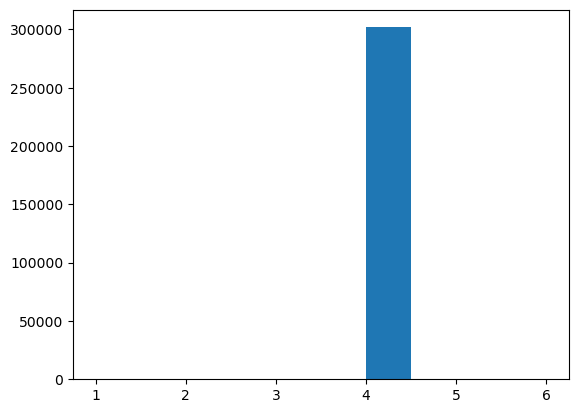

In [24]:
flat_list = [item for sublist in list(user_paths.values()) for item in sublist]
flat_lengths = [len(item) for item in flat_list]
plt.hist(flat_lengths)

# Evaluation

In [25]:
import seaborn as sns

## Load all users and divide into male and female

In [26]:
import pandas as pd
user_df = pd.read_csv('data/lfm/75percent_subset_users.tsv', sep='\t')

In [27]:
user_ids = list(user_paths.keys())

In [28]:
external_user_ids = [int(item) for item in dataset.id2token(dataset.uid_field, user_ids)]

In [29]:
# remove users that recbole removed in the dataset creation process
user_df = user_df[user_df.user_id.isin(external_user_ids)]

In [30]:
male_users = user_df[user_df.gender == 'm']
female_users = user_df[user_df.gender =='f']

In [31]:
print('Male users: %s, %s(%%)' % (len(male_users), len(male_users)/(len(male_users)+len(female_users))))
print('Male users: %s, %s(%%)' % (len(female_users), len(female_users)/(len(male_users)+len(female_users))))

Male users: 7857, 0.8115897118066315(%)
Male users: 1824, 0.18841028819336844(%)


<BarContainer object of 2 artists>

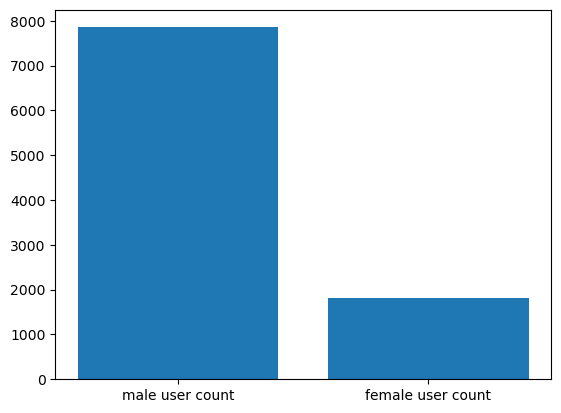

In [32]:
plt.bar(['male user count', 'female user count'], [len(male_users), len(female_users)])

In [33]:
male_internal_user_ids = dataset.token2id(dataset.uid_field, [str(item) for item in male_users.user_id.to_numpy()])
female_internal_user_ids = dataset.token2id(dataset.uid_field, [str(item) for item in female_users.user_id.to_numpy()])

In [34]:
def internal_id_to_gender(idx: int):
    return 'm' if idx in male_internal_user_ids else 'f'

In [35]:
def is_male(idx:int):
    return idx in male_internal_user_ids

### Calculate average path length on per user basis

In [36]:
user_average_path_lengths = {}
for key in user_paths.keys():
    paths_for_user = user_paths[key]
    average_path_length = np.mean([len(path) for path in paths_for_user])
    user_average_path_lengths[key] = average_path_length

/home/jfallmann/miniconda3/envs/pr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jfallmann/miniconda3/envs/pr/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [37]:
length_distribution_dataframe = pd.DataFrame({'gender': [internal_id_to_gender(idx) for idx in user_paths.keys()], 'average path length': list(user_average_path_lengths.values()), 'male/female': ['_' for _ in user_paths.keys()]})
length_distribution_dataframe

,gender,average path length,male/female
0,m,4.0,_
1,f,4.0,_
2,m,4.0,_
3,m,4.0,_
4,m,4.0,_
...,...,...,...
9676,f,NaN,_
9677,f,4.0,_
9678,m,4.0,_
9679,m,4.0,_


Text(0.5, 0, 'Path length')

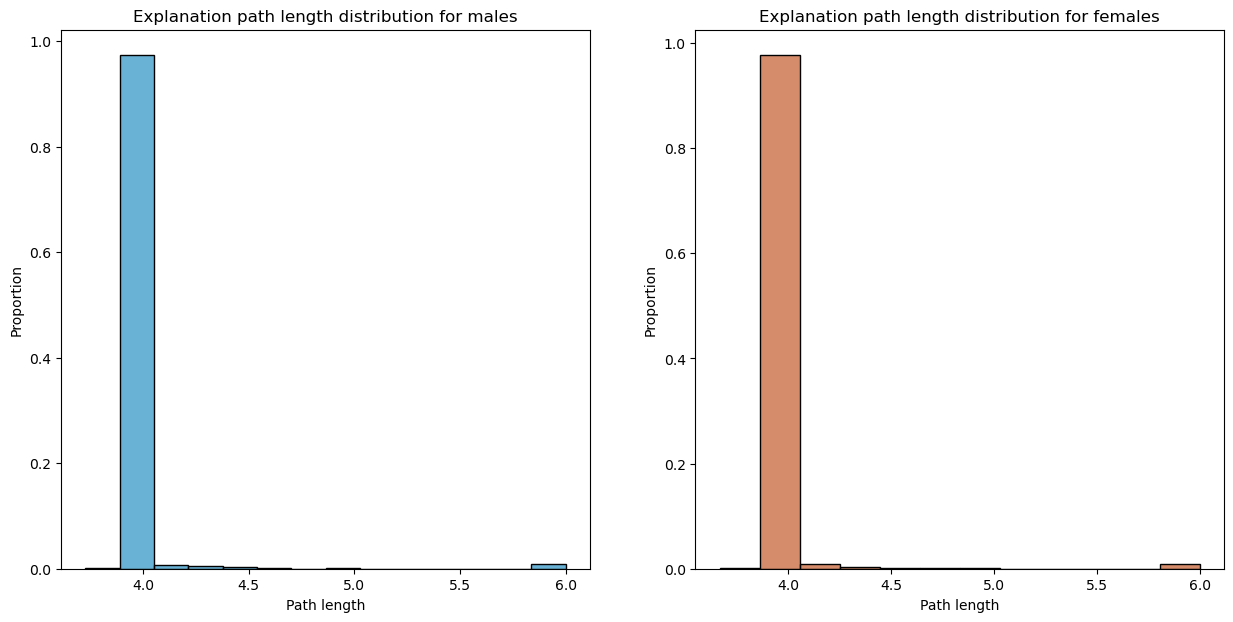

In [38]:
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))

sns.histplot(data=length_distribution_dataframe[length_distribution_dataframe.gender == 'm'], ax=ax1, stat="proportion",
             x="average path length", kde=False,
             color="#3899C7",
             element="bars", legend=True)
ax1.set_title("Explanation path length distribution for males")
ax1.set_xlabel("Path length")

sns.histplot(data=length_distribution_dataframe[length_distribution_dataframe.gender == 'f'], ax=ax2, stat="proportion", multiple="stack",
             x="average path length", kde=False,
             color='#C76638',
             element="bars", legend=True)
ax2.set_title("Explanation path length distribution for females")
ax2.set_xlabel("Path length")

<AxesSubplot: xlabel='male/female', ylabel='average path length'>

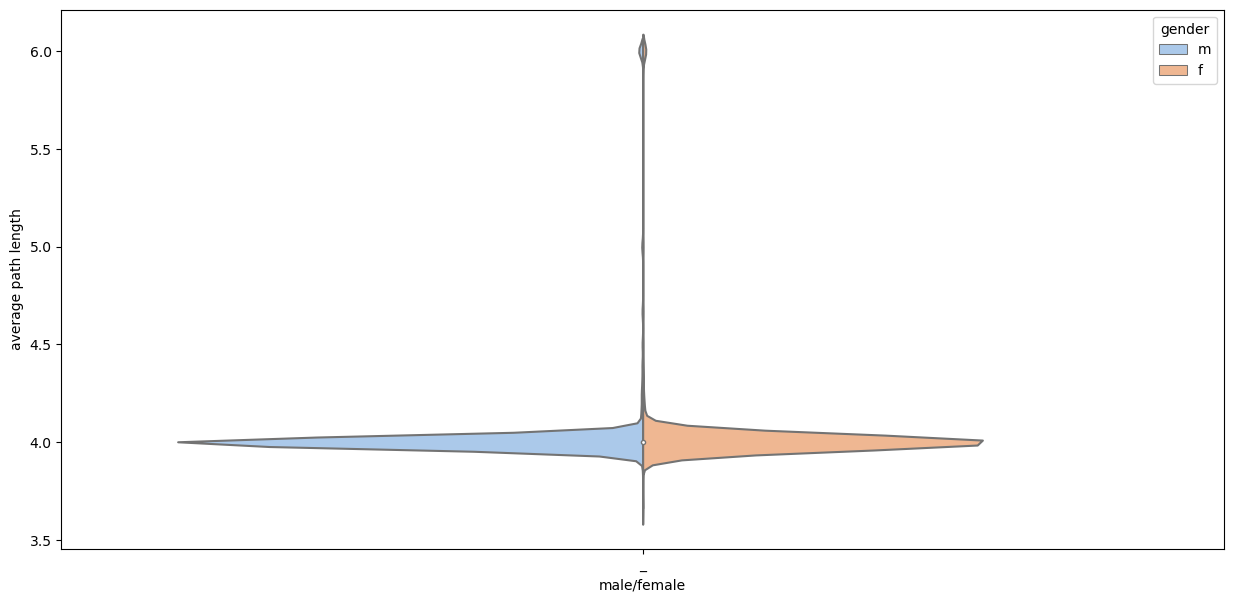

In [39]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,7))
sns.violinplot(data=length_distribution_dataframe, y='average path length', x='male/female', hue='gender', split=True, palette="pastel", stat='proportion', legend=True)

<AxesSubplot: xlabel='male/female', ylabel='average path length'>

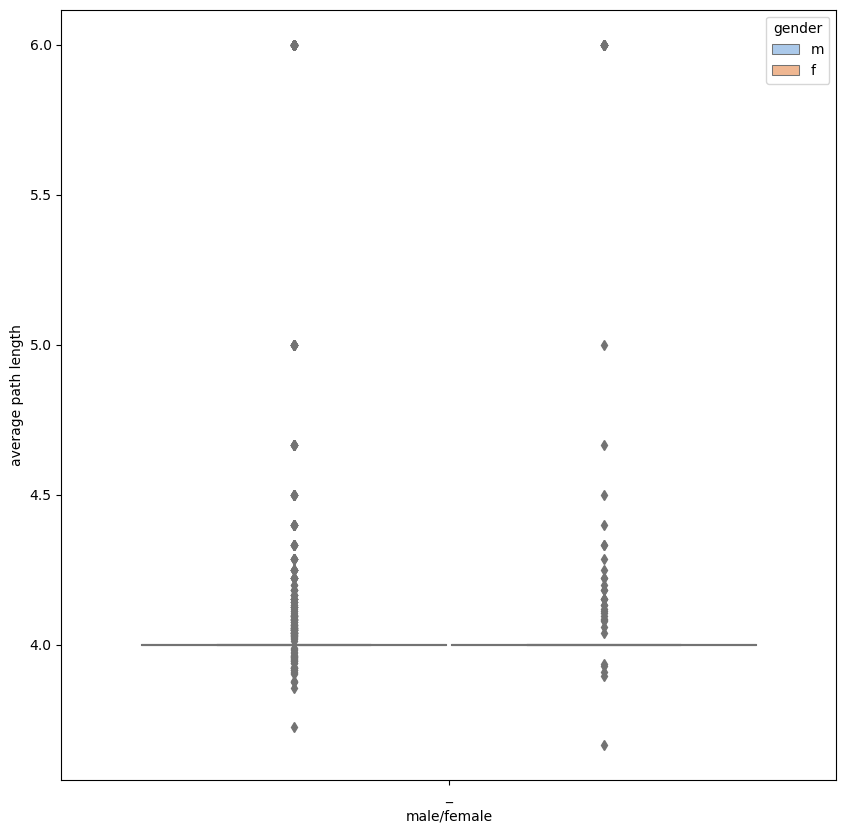

In [40]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10,10))
sns.boxplot(y="average path length", x="male/female",
            hue="gender", palette="pastel",
            data=length_distribution_dataframe)

## Evaluate path length per gender per user

In [41]:
import math

In [42]:
male_path_lengths = {}
for key in user_paths.keys():
    if key in male_internal_user_ids:
        if not math.isnan(user_average_path_lengths[key]):
            male_path_lengths[key] = user_average_path_lengths[key]

female_path_lengths = {}
for key in user_paths.keys():
    if key in female_internal_user_ids:
        if not math.isnan(user_average_path_lengths[key]):
            female_path_lengths[key] = user_average_path_lengths[key]

In [43]:
np.mean(list(male_path_lengths.values()))

4.022661015952647

In [44]:
np.median(list(male_path_lengths.values()))

4.0

In [45]:
np.mean(list(female_path_lengths.values()))

4.020694948653

In [46]:
np.median(list(female_path_lengths.values()))

4.0

## Evaluate path length per gender

In [47]:
male_paths = {}
for key in user_paths.keys():
    if key in male_internal_user_ids:
        male_paths[key] = user_paths[key]

female_paths = {}
for key in user_paths.keys():
    if key in female_internal_user_ids:
        female_paths[key] = user_paths[key]

In [48]:
def average_path_length(paths: dict):
    flat_list = [item for sublist in list(paths.values()) for item in sublist]
    lengths = [len(item) for item in flat_list]
    return np.mean(lengths), lengths

In [49]:
male_average, male_lengths = average_path_length(male_paths)

In [50]:
female_average, female_lengths = average_path_length(female_paths)

In [51]:
female_average, male_average

(4.001499472016896, 4.001440113639485)

## Evaluate shared entities

In [52]:
male_shared_entities = []
female_shared_entities = []
for user_id in user_paths.keys():
    paths_for_user = user_paths[user_id]
    paths_without_start_and_end = [path[1:] for path in paths_for_user]
    paths_without_start_and_end = list(filter(lambda x: len(x) > 0, paths_without_start_and_end))

    try:
        concatenated_paths = np.concatenate(paths_without_start_and_end)
    except:
        pass
    
    if is_male(user_id):
        male_shared_entities.append(concatenated_paths)
    else:
        female_shared_entities.append(concatenated_paths)
    
male_shared_entities_concatenated = np.concatenate(male_shared_entities)
female_shared_entities_concatenated = np.concatenate(female_shared_entities)

In [53]:
def evaluate_gender_of_shared_entities(data):
    gender_token, counts = np.unique(data, return_counts=True)
    distribution = {gender_token[0]: counts[0]/np.sum(counts)}
    if len(gender_token) == 2:
        distribution[gender_token[1]] = counts[1]/np.sum(counts)
    return (distribution, len(data))

### Evaluate grouped by user by gender

In [54]:
male_shared_gender_statistics = []
for shared_entities in male_shared_entities:
    shared_users = shared_entities[shared_entities < dataset.user_num]
    shared_gender_tokens = [internal_id_to_gender(idx) for idx in shared_users]
    male_shared_gender_statistics.append(evaluate_gender_of_shared_entities(shared_gender_tokens))
    
female_shared_gender_statistics = []
for shared_entities in female_shared_entities:
    shared_users = shared_entities[shared_entities < dataset.user_num]
    shared_gender_tokens = [internal_id_to_gender(idx) for idx in shared_users]
    female_shared_gender_statistics.append(evaluate_gender_of_shared_entities(shared_gender_tokens))

In [55]:
male_shared_gender_df = pd.DataFrame({'gender': ['m' for _ in male_shared_gender_statistics], 'male_proportion': [float(item['m']) if 'm' in item else 0 for item, _ in male_shared_gender_statistics],'female_proportion': [float(item['f']) if 'f' in item else 0 for item,_ in male_shared_gender_statistics], 'male - female': ['_' for item in male_shared_gender_statistics] })
female_shared_gender_df = pd.DataFrame({'gender': ['f' for _ in female_shared_gender_statistics], 'male_proportion': [float(item['m']) if 'm' in item else 0 for item, _ in female_shared_gender_statistics],'female_proportion': [float(item['f']) if 'f' in item else 0 for item,_ in female_shared_gender_statistics], 'male - female': ['_' for item in female_shared_gender_statistics] })

In [56]:
male_shared_gender_df.mean()

/tmp/ipykernel_81016/325008653.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  male_shared_gender_df.mean()


male_proportion      0.863324
female_proportion    0.136676
dtype: float64

In [57]:
female_shared_gender_df.mean()

/tmp/ipykernel_81016/384587550.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  female_shared_gender_df.mean()


male_proportion      0.777028
female_proportion    0.222972
dtype: float64

(0.0, 0.3)

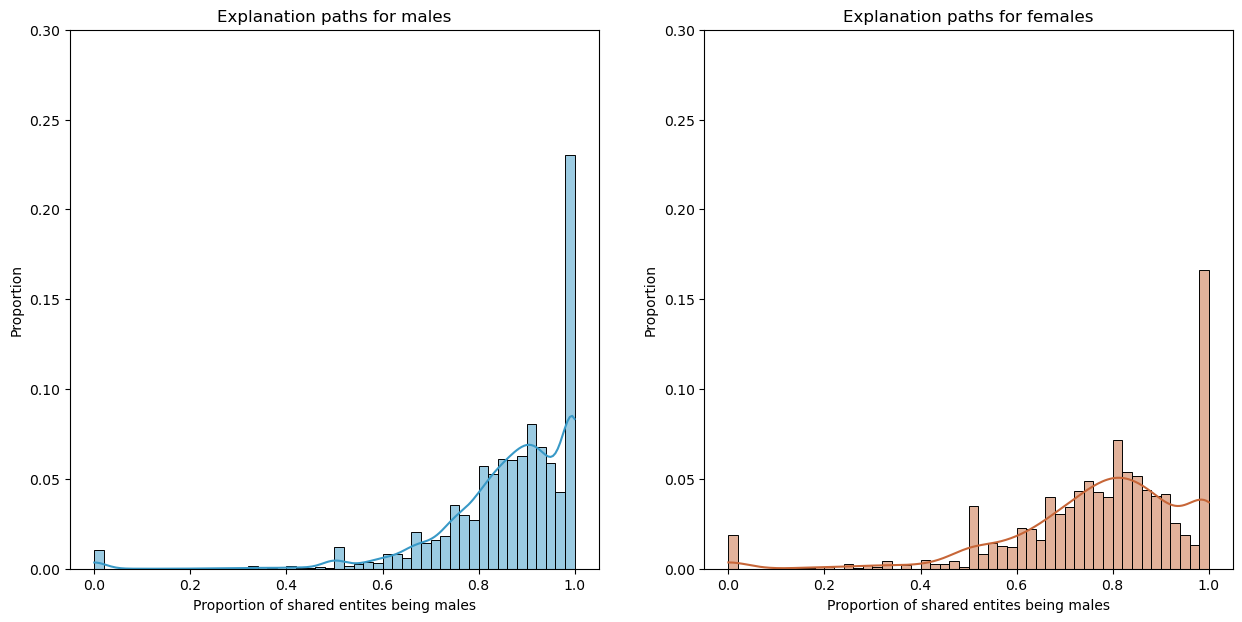

In [58]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))

sns.histplot(data=male_shared_gender_df, ax=ax1, stat="proportion",
             x="male_proportion", kde=True,
             color="#3899C7",
             element="bars", legend=True, binwidth=.02)
ax1.set_title("Explanation paths for males")
ax1.set_xlabel("Proportion of shared entites being males")
ax1.set_ylim(0,0.30)

sns.histplot(data=female_shared_gender_df, ax=ax2, stat="proportion", multiple="stack",
             x="male_proportion", kde=True,
             color='#C76638',
             element="bars", legend=True, binwidth=.02)
ax2.set_title("Explanation paths for females")
ax2.set_xlabel("Proportion of shared entites being males")
ax2.set_ylim(0,0.30)


(0.0, 0.3)

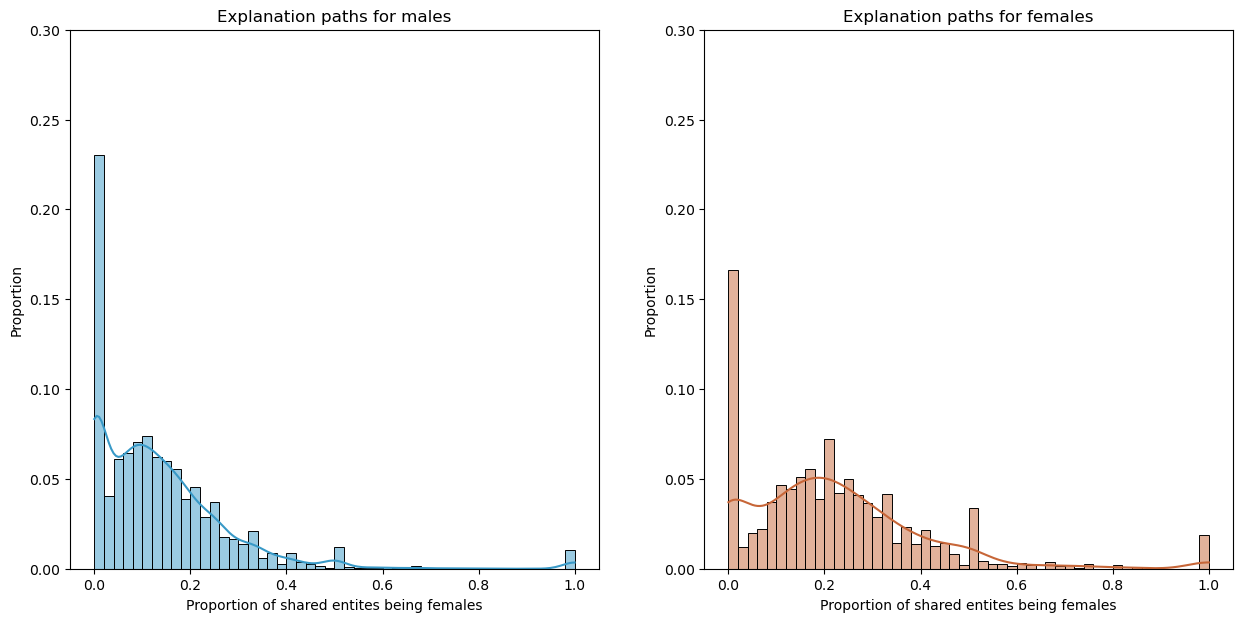

In [59]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))

sns.histplot(data=male_shared_gender_df, ax=ax1, stat="proportion",
             x="female_proportion", kde=True,
             color="#3899C7",
             element="bars", legend=True, binwidth=.02)
ax1.set_title("Explanation paths for males")
ax1.set_xlabel("Proportion of shared entites being females")
ax1.set_ylim(0,0.30)

sns.histplot(data=female_shared_gender_df, ax=ax2, stat="proportion", multiple="stack",
             x="female_proportion", kde=True,
             color='#C76638',
             element="bars", legend=True, binwidth=.02)
ax2.set_title("Explanation paths for females")
ax2.set_xlabel("Proportion of shared entites being females")
ax2.set_ylim(0,0.30)


### Evaluate grouped by gender

In [60]:
male_shared_item_ids, male_shared_item_counts = np.unique(male_shared_entities_concatenated, return_counts=True)
female_shared_item_ids, female_shared_item_counts = np.unique(female_shared_entities_concatenated, return_counts=True)

In [61]:
male_shared_item_ids = np.flip(male_shared_item_ids[np.argsort(male_shared_item_counts)])
male_shared_item_counts = np.flip(male_shared_item_counts[np.argsort(male_shared_item_counts)])
female_shared_item_ids = np.flip(female_shared_item_ids[np.argsort(female_shared_item_counts)])
female_shared_item_counts = np.flip(female_shared_item_counts[np.argsort(female_shared_item_counts)])

In [62]:
male_shared_entity_count = np.sum(male_shared_item_counts)
female_shared_entity_count = np.sum(female_shared_item_counts)

In [63]:
for entity_idx, shared_entity in enumerate(male_shared_item_ids[:10]):
    print('Entity %s. \t %s \t %s%%' % (shared_entity, male_shared_item_counts[entity_idx], male_shared_item_counts[entity_idx]*100/male_shared_entity_count))

Entity 956. 	 949 	 0.12384248384436301%
Entity 325. 	 755 	 0.09852589599841315%
Entity 5792. 	 653 	 0.08521511269796528%
Entity 1878. 	 622 	 0.08116967855763309%
Entity 1735. 	 587 	 0.07660225291532254%
Entity 2829. 	 527 	 0.06877238038564733%
Entity 735. 	 504 	 0.06577092924927182%
Entity 160. 	 495 	 0.06459644836982054%
Entity 5570. 	 487 	 0.06355246536586384%
Entity 1520. 	 461 	 0.060159520603004585%


In [64]:
for entity_idx, shared_entity in enumerate(female_shared_item_ids[:10]):
    print('Entity %s. \t %s \t %s%%' % (shared_entity, female_shared_item_counts[entity_idx], female_shared_item_counts[entity_idx]*100/female_shared_entity_count))

Entity 735. 	 158 	 0.11104863649142536%
Entity 160. 	 142 	 0.09980320494798987%
Entity 5792. 	 141 	 0.09910036547652516%
Entity 4388. 	 119 	 0.08363789710430138%
Entity 2829. 	 115 	 0.0808265392184425%
Entity 110. 	 111 	 0.07801518133258364%
Entity 4702. 	 102 	 0.07168962608940119%
Entity 2095. 	 88 	 0.06184987348889514%
Entity 790. 	 82 	 0.05763283666010683%
Entity 4622. 	 78 	 0.054821478774247964%


In [65]:
male_shared_users = male_shared_item_ids[male_shared_item_ids < dataset.user_num]
female_shared_users = female_shared_item_ids[female_shared_item_ids < dataset.user_num]

In [66]:
male_shared_user_gender = [internal_id_to_gender(idx) for idx in male_shared_users]
female_shared_user_gender = [internal_id_to_gender(idx) for idx in female_shared_users]

In [67]:
evaluate_gender_of_shared_entities(male_shared_user_gender)

({'f': 0.18154863724483977, 'm': 0.8184513627551602}, 8769)

In [68]:
evaluate_gender_of_shared_entities(female_shared_user_gender)

({'f': 0.19083186877562977, 'm': 0.8091681312243703}, 6828)

In [69]:
evaluate_gender_of_shared_entities(male_shared_user_gender[:100])

({'f': 0.09, 'm': 0.91}, 100)

In [70]:
evaluate_gender_of_shared_entities(female_shared_user_gender[:100])

({'f': 0.31, 'm': 0.69}, 100)